## Simulation of Color Vision Deficiency

Medicolor


In [1]:
// Ref: https://qiita.com/adacola/items/6309913e49b49342e720

open System
open System.IO
open System.Drawing

let displayBase64 (mime: string) (base64String: string) =
  let url = $"data:{mime};base64,{base64String}"
  display(HTML($"""<img src="{url}" />"""))

let displayImageFile (file: string) =
  let ext = Path.GetExtension(file).ToLower()
  let mime = match ext with ".jpg" | ".jpeg" -> "image/jpeg" | ".png" -> "image/png" | ".gif" -> "image/gif" | other -> failwith $"{other} is not supported."
  let bytes = File.ReadAllBytes(file)
  let base64String = Convert.ToBase64String(bytes)
  displayBase64 mime base64String


Original image:



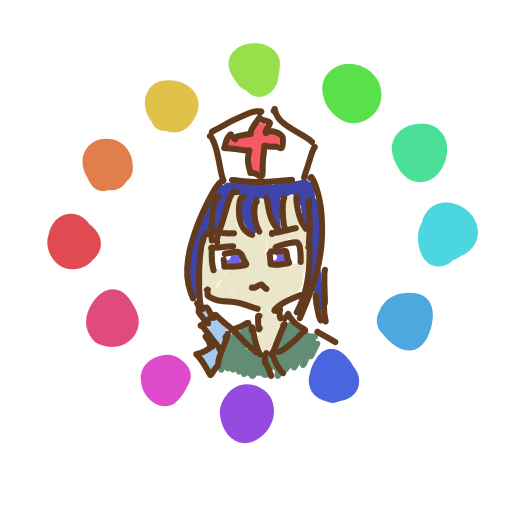

In [2]:
open Microsoft.DotNet.Interactive
open Microsoft.DotNet.Interactive.Commands

let imageFilePath: string = Kernel.GetInputAsync("Enter the path to the image file: ", "file").Result

printfn "Original image:"
displayImageFile(imageFilePath)


In [3]:
#r "nuget: Microsoft.Maui.Graphics"
#r "nuget: Microsoft.Maui.Graphics.Skia"
#r "nuget: SkiaSharp"
#r "nuget: SkiaSharp.NativeAssets.Linux.NoDependencies"

Installed Packages Microsoft.Maui.Graphics, 9.0.70 Microsoft.Maui.Graphics.Skia, 9.0.70 SkiaSharp, 3.119.0 SkiaSharp.NativeAssets.Linux.NoDependencies, 3.119.0

Loading extensions from `/home/lemon73/.nuget/packages/skiasharp/3.119.0/interactive-extensions/dotnet/SkiaSharp.DotNet.Interactive.dll`

In [4]:
// This code was created by IvyCafe
// Original source: https://github.com/IvyCafe/Medicolor/blob/2ba43499e3d5cb62c72d78ad7ad82e64e6f371cb/src/Program.cs

using System.IO;
using Microsoft.DotNet.Interactive;
using Microsoft.Maui.Graphics;
using Microsoft.Maui.Graphics.Platform;
using Microsoft.Maui.Graphics.Skia;
using SkiaSharp;

// Share the image file with the F# kernel to use C#
#!set --value @fsharp:imageFilePath --name imageFilePath

IImage source;
using (FileStream fs = File.OpenRead(imageFilePath))
{
    source = PlatformImage.FromStream(fs);
}

if (source is not SkiaImage && source is PlatformImage platformImage)
{
    IImage image = SkiaImage.FromStream(platformImage.AsStream());
    source.Dispose();
    source = image;
}

SKBitmap bitmap = new();
using (FileStream fs = File.OpenRead(imageFilePath))
{
    bitmap = SKBitmap.Decode(fs);
}
SKImageInfo info = new((int)source.Width, (int)source.Height);
using (SKSurface surface = SKSurface.Create(info))
{
    SKCanvas canvas = surface.Canvas;

    // Console.WriteLine("Which type would you like to convert? (1 = Protanomaly, 2 = Deuteranomaly, 3 = Tritanomaly)");
    for (int i = 1; i <= 3; i++)
    {
        using (SKPaint paint = new())
        {
            paint.ColorFilter = SKColorFilter.CreateColorMatrix(ColorMatrix(i));
            canvas.DrawBitmap(bitmap, new SKRect(0, 0, source.Width, source.Height), paint);
        }

        using (FileStream output = File.OpenWrite($"output{i}.png"))
        {
            surface.Snapshot().Encode(SKEncodedImageFormat.Png, 100).SaveTo(output);
        }
    }
}

source.Dispose();

static float[] ColorMatrix(int colorType)
{
    switch (colorType)
    {
        case 1:
            return [
                0.152286f,  1.052583f,  -0.204868f, 0,  0,
                0.114503f,  0.786281f,  0.099216f,  0,  0,
                -0.003882f, -0.048116f, 1.051998f,  0,  0,
                0,          0,          0,          1,  0
            ];

        case 2:
            return [
                0.367322f,  0.860646f,  -0.227968f, 0,  0,
                0.280085f,  0.672501f,  0.047413f,  0,  0,
                -0.011820f, 0.042940f,  0.968881f,  0,  0,
                0,          0,          0,          1,  0
            ];

        case 3:
            return [
                1.255528f,  -0.076749f, -0.178779f, 0,  0,
                -0.078411f, 0.930809f,  0.147602f,  0,  0,
                0.004733f,  0.691367f,  0.303900f,  0,  0,
                0,          0,          0,          1,  0
            ];

        default:
            return [];
    }
}


Protanomaly:



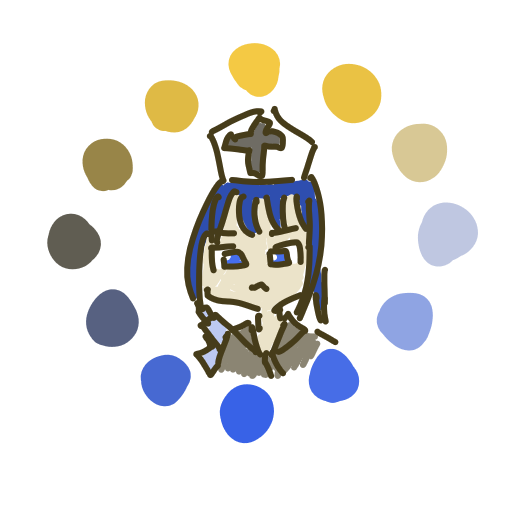

Deuteranomaly:



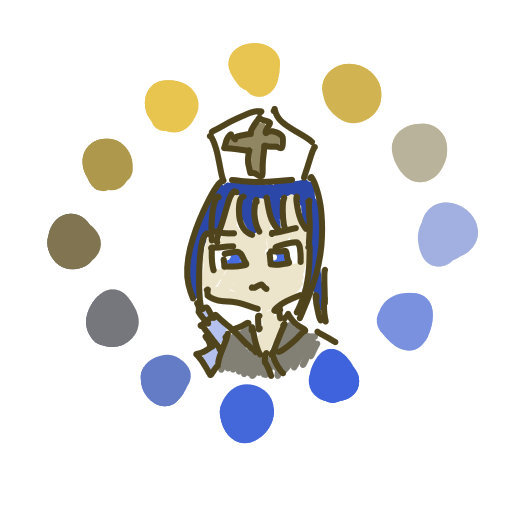

Tritanomaly:



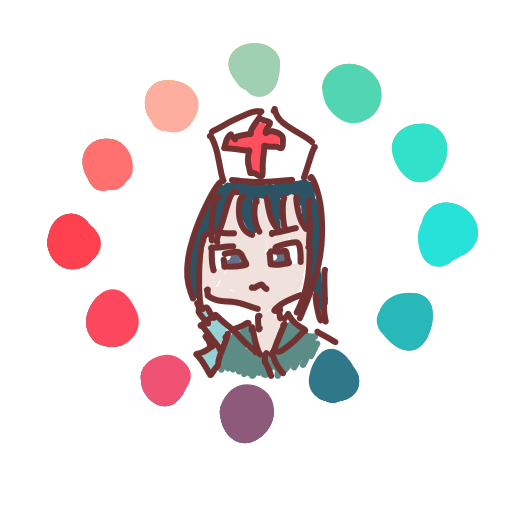

In [5]:
printfn "Protanomaly:"
displayImageFile("output1.png")

printfn "Deuteranomaly:"
displayImageFile("output2.png")

printfn "Tritanomaly:"
displayImageFile("output3.png")


In [6]:
using System.IO;

File.Delete("output1.png");
File.Delete("output2.png");
File.Delete("output3.png");
